## EDA

### Carga de datos

In [ ]:
# Carga de datos con pandas

import pandas as pd
import pyarrow.parquet as pq

table = pq.read_table('..//data//raw//sample_data_0006_part_00.parquet')


df_pandas = table.to_pandas(ignore_metadata=True)
df_pandas.head()


,merchant_id,_id,subsidiary,transaction_date,account_number,user_id,transaction_amount,transaction_type
0,075d178871d8d48502bf1f54887e52fe,aa8dacff663072244d0a8ab6bbe36b93,824b2af470cbe6a65b15650e03b740fc,2021-09-12 18:32:03,648e257c9d74909a1f61c54b93a9e1b3,ba42d192a145583ba8e7bf04875f837f,178.33365037,CREDITO
1,075d178871d8d48502bf1f54887e52fe,a53bb81bd0bba2ae2535bda7ea5a550c,2d8d34be7509a6b1262336d036fdb324,2021-09-12 18:31:58,c0b62f9046c83ea5543ea46a497a4d6e,5cfff960ea6d732c1ba3e63d24f3be52,35.66673007,CREDITO
2,075d178871d8d48502bf1f54887e52fe,79f893ea65c06fe2933f3847c88c272f,5eeb18254850b21af0a6bb2697913cd3,2021-09-12 18:31:56,872d10143fc0ac7d5de467806f6bef81,c97e63a92c82c7217b333635d75928ed,142.66692029,CREDITO
3,075d178871d8d48502bf1f54887e52fe,ce577223699dbdc119df2ab8a35457fe,5221a599856c0a0588ed9ffd150edd3b,2021-09-12 18:31:10,2e35cfe7860a480a93e1c83e99843579,fc09bdd00f283222d65eaff4d00a6594,8.32223701,CREDITO
4,075d178871d8d48502bf1f54887e52fe,0ce7ab2950e7a788a608f881aec0f8f0,971e55ef12d80ec070ea4f6750c8b892,2021-09-12 18:31:07,995bc89e4c4e00334f1f90c4a55f4729,213527e8ba94fcaf2f9378969f9f6abc,32.10005706,CREDITO


In [2]:
df_pandas.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10758418 entries, 0 to 10758417
Data columns (total 8 columns):
 #   Column              Dtype         
---  ------              -----         
 0   merchant_id         object        
 1   _id                 object        
 2   subsidiary          object        
 3   transaction_date    datetime64[ns]
 4   account_number      object        
 5   user_id             object        
 6   transaction_amount  object        
 7   transaction_type    object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.0 GB


In [ ]:
# Con pandas: memory usage: ~ 6.0 GB
# Número de registros: 10.758.418

In [1]:
import polars as pl
import polars.selectors as cs

In [2]:
# carga de datos con polars

df_polars = pl.read_parquet("..//data//raw//sample_data_0006_part_00.parquet")
df_polars.head()

merchant_id,_id,subsidiary,transaction_date,account_number,user_id,transaction_amount,transaction_type
str,str,str,datetime[ns],str,str,"decimal[24,8]",str
"""075d178871d8d48502bf1f54887e52…","""aa8dacff663072244d0a8ab6bbe36b…","""824b2af470cbe6a65b15650e03b740…",2021-09-12 18:32:03,"""648e257c9d74909a1f61c54b93a9e1…","""ba42d192a145583ba8e7bf04875f83…",178.33365037,"""CREDITO"""
"""075d178871d8d48502bf1f54887e52…","""a53bb81bd0bba2ae2535bda7ea5a55…","""2d8d34be7509a6b1262336d036fdb3…",2021-09-12 18:31:58,"""c0b62f9046c83ea5543ea46a497a4d…","""5cfff960ea6d732c1ba3e63d24f3be…",35.66673007,"""CREDITO"""
"""075d178871d8d48502bf1f54887e52…","""79f893ea65c06fe2933f3847c88c27…","""5eeb18254850b21af0a6bb2697913c…",2021-09-12 18:31:56,"""872d10143fc0ac7d5de467806f6bef…","""c97e63a92c82c7217b333635d75928…",142.66692029,"""CREDITO"""
"""075d178871d8d48502bf1f54887e52…","""ce577223699dbdc119df2ab8a35457…","""5221a599856c0a0588ed9ffd150edd…",2021-09-12 18:31:10,"""2e35cfe7860a480a93e1c83e998435…","""fc09bdd00f283222d65eaff4d00a65…",8.32223701,"""CREDITO"""
"""075d178871d8d48502bf1f54887e52…","""0ce7ab2950e7a788a608f881aec0f8…","""971e55ef12d80ec070ea4f6750c8b8…",2021-09-12 18:31:07,"""995bc89e4c4e00334f1f90c4a55f47…","""213527e8ba94fcaf2f9378969f9f6a…",32.10005706,"""CREDITO"""


In [3]:
print("Tamaño base de datos", df_polars.shape)
print(df_polars.estimated_size("gb"))

Tamaño base de datos (10758418, 8)
1.9057342307642102


* Con Polars: uso de memoria: ~1.9 GB
* Número de registros: 10,758,418
* Justificación de por qué en este caso se utiliza Polars.
* También se podría usar PySpark o cargar solo 1M de registros si se desea emplear Pandas y se cuentan con pocos recursos computacionales.

### Análisis básica de variables

In [4]:
# Tipos de datos en la base de datos
df_polars.glimpse()

Rows: 10758418
Columns: 8
$ merchant_id                  <str> '075d178871d8d48502bf1f54887e52fe', '075d178871d8d48502bf1f54887e52fe', '075d178871d8d48502bf1f54887e52fe', '075d178871d8d48502bf1f54887e52fe', '075d178871d8d48502bf1f54887e52fe', '075d178871d8d48502bf1f54887e52fe', '075d178871d8d48502bf1f54887e52fe', '075d178871d8d48502bf1f54887e52fe', '075d178871d8d48502bf1f54887e52fe', '075d178871d8d48502bf1f54887e52fe'
$ _id                          <str> 'aa8dacff663072244d0a8ab6bbe36b93', 'a53bb81bd0bba2ae2535bda7ea5a550c', '79f893ea65c06fe2933f3847c88c272f', 'ce577223699dbdc119df2ab8a35457fe', '0ce7ab2950e7a788a608f881aec0f8f0', '01220d4c4ed48cfd6f7ca5f278f9a6f6', 'f02cabf07366d25120c9b2e7019a4205', 'fb12816c831921ff105fea2197ab26b1', 'faf1f94ffdcd14b92523439672079498', '76d975dce75647824a3ff3d1c8e4fa4c'
$ subsidiary                   <str> '824b2af470cbe6a65b15650e03b740fc', '2d8d34be7509a6b1262336d036fdb324', '5eeb18254850b21af0a6bb2697913cd3', '5221a599856c0a0588ed9ffd150edd3b', '

Tipos de datos consistentes:
* String para los IDs
* Decimal para la cantidad
* Datetime para las fechas

### Análisis básico consistencia en los datos

In [7]:
df_polars.select(cs.numeric()).describe()

statistic,transaction_amount
str,f64
"""count""",1.0758418e7
"""null_count""",0.0
"""mean""",191.397399
"""std""",240.863288
"""min""",5.944455
"""25%""",35.66673
"""50%""",107.00019
"""75%""",237.7782
"""max""",4624.786


* No hay valores nulos en la variable numérica.
* Transacción mínima: ~5.9 USD (suponiendo que está en dólares, dado que es ficticia).
* Transacción máxima: ~4,624 USD.
* Transacción media: ~240 USD.
---
A partir de esta información, puedo inferir que no existen valores inconsistentes en la variable numérica, como transacciones con valores negativos o outliers, como por ejemplo, una transacción de 500,000 USD.

In [9]:
print("Fecha Minima", min(df_polars["transaction_date"]))
print("Fecha Máxima", max(df_polars["transaction_date"]))

Fecha Minima 2021-01-01 00:01:13
Fecha Máxima 2021-11-30 23:59:49


* Datos normales dentro del rango de fechas.

In [13]:
df_polars["transaction_type"].unique()

transaction_type
str
"""DEBITO"""
"""CREDITO"""


* Datos normales en la variable "tipo de transacción": Débito y Crédito.*

In [15]:
df_polars.null_count()

merchant_id,_id,subsidiary,transaction_date,account_number,user_id,transaction_amount,transaction_type
u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0


* Sin valores nulos en la base de datos

In [17]:
df_polars.is_duplicated().sum()

8

* Se detectaron 8 valores duplicados. Hay algo extraño: podría deberse a un error en la ingesta de datos o a una falla en el sistema. No debería haber registros duplicados, especialmente en el campo '_id', que representa un identificador único para cada transacción.

In [19]:
duplicados_mask = df_polars.is_duplicated()

df_duplicados = df_polars.filter(duplicados_mask)

print("Filas duplicadas:")
df_duplicados

Filas duplicadas:


merchant_id,_id,subsidiary,transaction_date,account_number,user_id,transaction_amount,transaction_type
str,str,str,datetime[ns],str,str,"decimal[24,8]",str
"""075d178871d8d48502bf1f54887e52…","""53f3b7bf5cf7c5509279f385eedca4…","""09f6be1ff97081582f7ae1b4aa8e16…",2021-08-23 10:49:08,"""669223a6679cd07a026f97fe4b1976…","""157b9aa3eb0ad227e4580095c4e4e7…",63.01122313,"""CREDITO"""
"""075d178871d8d48502bf1f54887e52…","""53f3b7bf5cf7c5509279f385eedca4…","""09f6be1ff97081582f7ae1b4aa8e16…",2021-08-23 10:49:08,"""669223a6679cd07a026f97fe4b1976…","""157b9aa3eb0ad227e4580095c4e4e7…",63.01122313,"""CREDITO"""
"""075d178871d8d48502bf1f54887e52…","""52227fbe95311404092cbc8fbf2d32…","""024b459a0851f51d731099ac10d1b3…",2021-08-26 14:58:58,"""8495c31cd0ba9c1c6ccf493cdf0e35…","""6405b4845df13af0ca2f03714ff486…",475.55640098,"""CREDITO"""
"""075d178871d8d48502bf1f54887e52…","""52227fbe95311404092cbc8fbf2d32…","""024b459a0851f51d731099ac10d1b3…",2021-08-26 14:58:58,"""8495c31cd0ba9c1c6ccf493cdf0e35…","""6405b4845df13af0ca2f03714ff486…",475.55640098,"""CREDITO"""
"""838a8fa992a4aa2fb5a0cf8b15b637…","""8f5418532506951085466a90e03593…","""6c8343dbee2910b629ff68d9a66543…",2021-09-08 10:20:40,"""e3fe1835484bf56eea4bbdd7d97c3f…","""6866c2ba6962fced9e8275bc505ef9…",594.44550123,"""CREDITO"""
"""838a8fa992a4aa2fb5a0cf8b15b637…","""8f5418532506951085466a90e03593…","""6c8343dbee2910b629ff68d9a66543…",2021-09-08 10:20:40,"""e3fe1835484bf56eea4bbdd7d97c3f…","""6866c2ba6962fced9e8275bc505ef9…",594.44550123,"""CREDITO"""
"""838a8fa992a4aa2fb5a0cf8b15b637…","""d737f8d70694471f3061002db7fb2a…","""fb06b4a71938b984fc729784c1db0f…",2021-09-05 15:44:13,"""79f3ffcf1cdf1d6e7166e9ef87d642…","""cb5364b29887ac940a8fc0eb02f7e6…",99.86684420,"""CREDITO"""
"""838a8fa992a4aa2fb5a0cf8b15b637…","""d737f8d70694471f3061002db7fb2a…","""fb06b4a71938b984fc729784c1db0f…",2021-09-05 15:44:13,"""79f3ffcf1cdf1d6e7166e9ef87d642…","""cb5364b29887ac940a8fc0eb02f7e6…",99.86684420,"""CREDITO"""


* Recomendación: analizar esas transacciones con el área experta.

In [20]:
df_duplicados_subconjunto = (
    df_polars
    .group_by('_id')
    .agg(pl.len().alias("count"))
    .filter(pl.col("count") > 1)
)

print("Duplicados basados solo en '_id':")
df_duplicados_subconjunto

C:\Users\px05202\AppData\Local\Temp\ipykernel_18892\4176291983.py:4: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  .agg(pl.count().alias("count"))


Duplicados basados solo en '_id':


_id,count
str,u32
"""01dd3dc328d6c7e40453c509311f3b…",2
"""d737f8d70694471f3061002db7fb2a…",2
"""53f3b7bf5cf7c5509279f385eedca4…",2
"""8f5418532506951085466a90e03593…",2
"""52227fbe95311404092cbc8fbf2d32…",2
"""c52a54da9927f445e5f621d6dac29b…",2
"""b93a2bb461682a71f593049250e68a…",2


In [4]:
print(len(df_polars))
print(len(df_polars.unique()))

10758418
10758414


* Se encontraron 8 registros duplicados. Nos quedamos con uno solo por cada duplicado, por lo tanto, se eliminaron 4 registros.

In [3]:
df_polars = df_polars.unique()

### Análisis descriptivos básicos

In [4]:
df_polars["transaction_type"].value_counts()

transaction_type,count
str,u32
"""CREDITO""",2167125
"""DEBITO""",8591289


In [21]:
print("Porcentaje de trasacciones tipo Credito", len(df_polars.filter(pl.col("transaction_type")=="CREDITO")) / len(df_polars) * 100 )
print("Porcentaje de trasacciones tipo Debito", len(df_polars.filter(pl.col("transaction_type")=="DEBITO")) / len(df_polars) * 100 )

Porcentaje de trasacciones tipo Credito 20.14353602677867
Porcentaje de trasacciones tipo Debito 79.85646397322134


* Aproximadamente el 20.1 % de las transacciones son de tipo crédito.
* Aproximadamente el 79.8 % de las transacciones son de tipo débito.

In [23]:
df_polars["merchant_id"].value_counts()

merchant_id,count
str,u32
"""817d18cd3c31e40e9bff0566baae77…",7267100
"""838a8fa992a4aa2fb5a0cf8b15b637…",1876698
"""075d178871d8d48502bf1f54887e52…",1614616


* Comercios aliados con más número de transacciones:
    * Comercio 1: 7.267.100 transacciones
    * Comercio 2: 1.876.698 transacciones
    * Comercio 3: 1.614.616 transacciones

In [28]:
df_polars["subsidiary"].value_counts().sort(by="count", descending=True).head(10)

subsidiary,count
str,u32
"""f54e0b6b32831a6307361ed959903e…",357448
"""8c52a2d7745e37bcee79717300f796…",170510
"""d4b621a24cc03e3f92155a7e241fa1…",165438
"""dff70ce33784a932ce4a7efc81a438…",122420
"""d4b31b123120a4eefd51ba95975f2a…",50786
"""4ecafb5dcecd6027257e8af4d9c828…",30557
"""3458b243beebecf55605ca649b6b2e…",28389
"""4f511a84e8c4b1c09991e0d876e880…",21967
"""fee20d2f0753125f11b4376da5dbad…",21698


* Top 10 sucursales con más número transacciones:
    * Sucursal 1: 357.448 transacciones
    * Sucursal 2: 170.510 transacciones
    * Sucursal 3: 165.438 transacciones

In [29]:
df_polars["user_id"].value_counts().sort(by="count", descending=True).head(10)

user_id,count
str,u32
"""5e674596af22a66e826bf15b2a363c…",1900
"""d3720205290ca7444d216167dd4cb0…",1728
"""e77fc30bb3bec8bf45a35b535b2920…",1358
"""09ef9d0c0923b7f4848655f0de4496…",1202
"""0457e033945b37b94d7f396aa07daa…",1200
"""93bb7c11b0b58e233f56f50cd70c1a…",1200
"""7fda354dbc3e684bf414d3ab27208d…",1173
"""84d55acc72d398e26fc939d06d17fd…",1100
"""cd15ab893db3f4ee8c43de00e2c42e…",1074


* Top 10 usuarios con más número de transacciones:
    * Usuario 1: 1.900 transacciones
    * Usuario 2: 1.728 transacciones
    * Usuario 3: 1.358 transacciones

In [32]:
df_polars.group_by("merchant_id").agg(pl.sum("transaction_amount").alias("total_amount")).sort(by="total_amount", descending=True).head(3)

merchant_id,total_amount
str,"decimal[24,8]"
"""817d18cd3c31e40e9bff0566baae77…",1613472762.46724610
"""075d178871d8d48502bf1f54887e52…",275443610.24180100
"""838a8fa992a4aa2fb5a0cf8b15b637…",170215621.35390098


* Top 3 comercios aliados con mayores montos de transacciones:
    * Comercio 1: ~1.613.472.762 USD transacciones
    * Comercio 2: ~275.443.610 USD transacciones
    * Comercio 3: ~170.215.621 UsD transacciones

In [33]:
df_polars.group_by("subsidiary").agg(pl.sum("transaction_amount").alias("total_amount")).sort(by="total_amount", descending=True).head(3)

subsidiary,total_amount
str,"decimal[24,8]"
"""8c52a2d7745e37bcee79717300f796…",11090289.68562763
"""f54e0b6b32831a6307361ed959903e…",9064215.67889283
"""d4b621a24cc03e3f92155a7e241fa1…",9025146.77021454


* Top 3 sucursales con mayores montos de transacciones:
    * Comercio 1: ~11.090.289 USD transacciones
    * Comercio 2: ~9.064.215 USD transacciones
    * Comercio 3: ~9.025.146 UsD transacciones

In [34]:
df_polars.group_by("user_id").agg(pl.sum("transaction_amount").alias("total_amount")).sort(by="total_amount", descending=True).head(3)

user_id,total_amount
str,"decimal[24,8]"
"""49c66b55f5b11fc568e8d41779b8f2…",273207.15236771
"""22e351bd70fdb319bbc102f8de27b7…",209660.92828548
"""f31b2a040df3eafea1d6d83e55704f…",206224.43884112


* Top 3 usuarios con mayores montos de transacciones:
    * Comercio 1: ~273.207 USD transacciones
    * Comercio 2: ~209.660 USD transacciones
    * Comercio 3: ~206.224 UsD transacciones
---
* También es posible analizar por la media u otros métodos de agregación.

### Análisis gráficos básicos

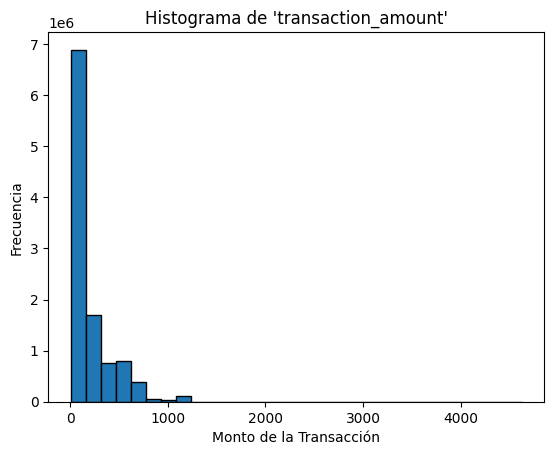

In [35]:
# Graficar el histograma
import matplotlib.pyplot as plt

plt.hist(df_polars["transaction_amount"], bins=30, edgecolor='black')

# Añadir títulos y etiquetas
plt.title("Histograma de 'transaction_amount'")
plt.xlabel("Monto de la Transacción")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()

* Si bien en análisis anteriores se comentó que no había outliers, de acuerdo con la gráfica anterior, una transacción superior a 4,000 USD podría considerarse un outlier. Sin embargo, este análisis debe tomarse con cuidado para definir qué es exactamente un outlier en este contexto.

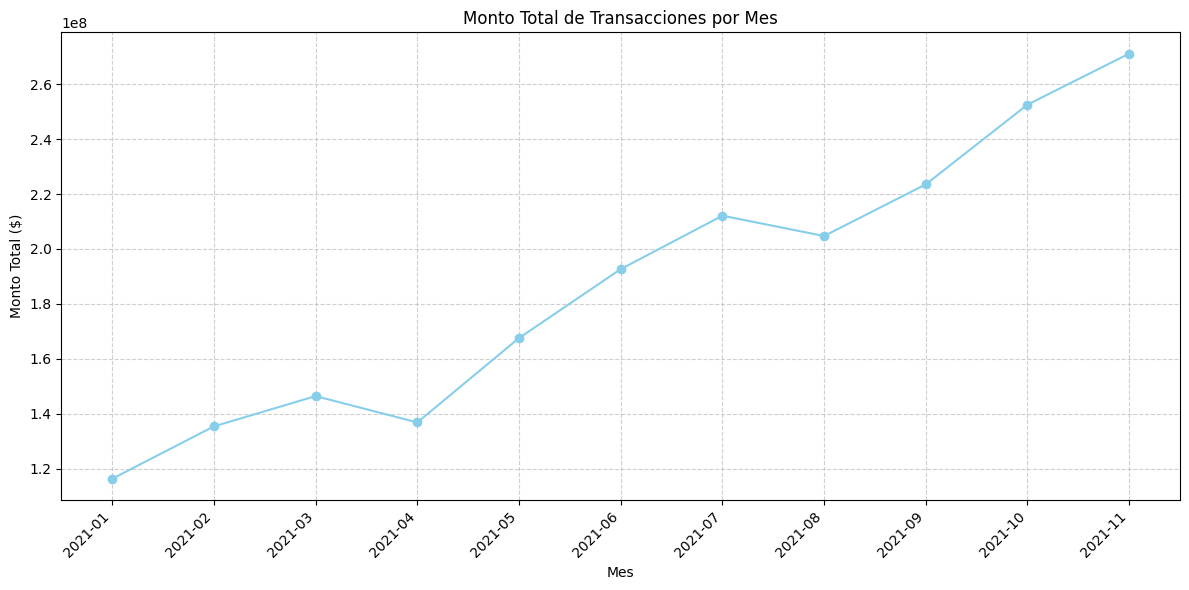

In [36]:
# Analisis mensual

df_monthly_transactions = (
    df_polars.with_columns(
        pl.col("transaction_date").dt.year().alias("year"),
        pl.col("transaction_date").dt.month().alias("month")
    )
    .group_by(["year", "month"]) # Agrupar por año y mes
    .agg(
        pl.sum("transaction_amount").alias("total_monthly_amount") # Sumar los montos
    )
    .sort(["year", "month"]) # Ordenar para que el gráfico tenga sentido cronológico
)


df_monthly_transactions = df_monthly_transactions.with_columns(
    (pl.col("year").cast(pl.String) + "-" + pl.col("month").cast(pl.String).str.pad_start(2, "0")).alias("year_month")
)

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(
    df_monthly_transactions["year_month"],
    df_monthly_transactions["total_monthly_amount"],
    marker='o', linestyle='-', color='skyblue'
)

# Añadir títulos y etiquetas
plt.title("Monto Total de Transacciones por Mes")
plt.xlabel("Mes")
plt.ylabel("Monto Total ($)")
plt.grid(True, linestyle='--', alpha=0.6)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

* Aparentemente no se evidencia outlier. Se puede aplicar un análisis semanal, e incluso diario, para detectar transacciones sospechosas.

### Análisis descriptivos detallados

In [41]:
df_polars = df_polars.with_columns([
    pl.col("transaction_date").dt.hour().alias("hour"),
    pl.col("transaction_date").dt.weekday().alias("weekday"),
    pl.col("transaction_date").dt.date().alias("date")
])

df_polars.head(3)


merchant_id,_id,subsidiary,transaction_date,account_number,user_id,transaction_amount,transaction_type,hour,weekday,date
str,str,str,datetime[ns],str,str,"decimal[24,8]",str,i8,i8,date
"""817d18cd3c31e40e9bff0566baae77…","""5f9e8c676c0d9603e271287ec6e599…","""f54d60e69993826366ab55c2445ea4…",2021-05-06 15:04:16,"""10229552d456905f494fcb8a545fbd…","""c79681f5aacf0b241c5efc95de1d05…",59.44455012,"""DEBITO""",15,4,2021-05-06
"""817d18cd3c31e40e9bff0566baae77…","""6a2b2170cb084657698631699d63c7…","""7f250e9b4e47784f1766843d914862…",2021-06-09 09:10:40,"""a3c0bfc702eb0eded68f01d2d3bbc2…","""7a7468d0d42eadd672ad4f91a2fc3a…",59.44455012,"""DEBITO""",9,3,2021-06-09
"""075d178871d8d48502bf1f54887e52…","""d4aa8246414eb9176e78fc9b9d9652…","""a03a35307a4fc80e1128aa5954cdcd…",2021-11-02 14:47:16,"""e47fc1a51e6b12cccc11a633bb7f97…","""5dbef3c9fae1e2e516204da9caaf00…",594.44431234,"""CREDITO""",14,2,2021-11-02


In [46]:
# Usuarios con más transacciones por hora
df_polars.group_by(["user_id", "hour"]).agg([
    pl.len().alias("count"),
    pl.sum("transaction_amount").alias("transaction_amount")
    ]).sort(["transaction_amount"], descending=True).head(5)


user_id,hour,count,transaction_amount
str,i8,u32,"decimal[24,8]"
"""49c66b55f5b11fc568e8d41779b8f2…",18,90,263268.02358707
"""5ea75f2c050a768c1bb4448395b7fb…",8,64,95949.44835429
"""22e351bd70fdb319bbc102f8de27b7…",18,41,89119.26954511
"""44863d7b56ff5259d1f9add0bbfcbf…",20,42,86099.48639886
"""dc362ceea1be88976b62bb6109a2f0…",9,91,64390.33669337


* Usuarios con más transacciones por hora:
    * Usuario 1: 90 transacciones en 1 hora por 263,268 USD a las 6:00 p.m.
        * ¿Es normal?
        * ¿Qué se considera normal?
        * ¿Cuántas transacciones son normales?
        * ¿Cuál es el monto normal por hora o por día?
    * Y así sucesivamente con los demás.

In [49]:
# Número de transacciones por usuario en 24 horas (por día)
df_polars.group_by(["user_id", "date"]).agg(
    pl.count("transaction_amount")
    .alias("num_transactions_24h")).sort("num_transactions_24h", descending=True).head(5)


user_id,date,num_transactions_24h
str,date,u32
"""71aa1651d9adc0b226107084fba3d7…",2021-02-07,288
"""e2d6158cc2b6467a47223cb2629f03…",2021-02-02,201
"""fc794dabb3afc434e73ce67e6b9542…",2021-02-08,200
"""ab2b8b5244e19c302a09d825a15d11…",2021-02-10,200
"""a78e7d86b67a355375bd174b2b859c…",2021-02-14,200


* Usuarios con más transacciones por día o 24 horas hábiles:
    * Usuario 1: 288 transacciones el 07-02-2021
        * ¿Es normal?
        * ¿Qué se considera normal?
        * ¿Cuántas transacciones son lo normal?
    * Y así sucesivamente con los demás.